# Pandemics
Our next model is going to be a stylized model of an infectious disease spreading through a population of agents. The model is inspired by a collection of animiations in the [Washington Post](https://www.washingtonpost.com/graphics/2020/world/corona-simulator/) which appeared early during the Covid-19 outbreak. We are going to expand on this by drawing inspiration from [this YouTube movie](https://www.youtube.com/watch?v=gxAaO2rsdIs). If you are interested in more details on the movie, it is all made in python and the code can be found on github. See the links provided in the description below the video.
 

## Assignment 1
Having looked at the example video and the animations of the Washington Post, how are you going to develop this model? 

**Answer: grow into complexity. Start with 1 agent bouncing arround inside a box, next expand this with 2 agents to get the interaction between the agents correct. Only then increase slowly the number of agents**.

## Assignment 2
Let's start conceptually outlining the model by answering the questions below. We aim to start with building a model for animantion number 3. That is the 2D model with simulitis spreading through the population while keeping track of the dynamics over time. 


1. How many types of agents do we need? What are the key attributes for this Agent or these Agents? Can you sketch a basic Class diagram (see lecture 2)?

    **one,  susceptible (healthy), infected (sick), and recovered are a state of an agent and not a different type of agent**
    
    * **position in x,y**
    * **speed**
    * **direction**
    * **state {susceptible, infected, recovered}**
    

2. What kind of space do we need and how do we handle the edges of the space?

    **ContinousGrid, bouncing at the edge**


## Assignment 3

We are going to start with a single ball, bouncing arround in a continuous space. The edges are firm so the ball should bounce of the edge. However, in the implementation we are already accounting for more agents.

* fill in the `__init__` method of the model, see the comment in the code for basic hints. d
* also specify the `__init__` of the agent. Be careful with the agent. You might need to use @property like in the car example discussed in class


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import ContinuousSpace

In [2]:
import math
from itertools import combinations
from enum import Enum
from sklearn import metrics


class InfectionModel(Model):
    """A model with some number of agents.
    
    Parameters
    ----------
    N : int
        number of agents
    width : int
            width of space
    height : int
             height of space
    radius : float, optional
             controls the size of the balls
    seed : None, optional
    
    Attributes
    ----------
    num_agents : int
    space : ContinousSpace
    schedule : RandomActiviation instance
    
    """
    
    def __init__(self, N, width, height, radius=1,
                seed=None):
        super().__init__(seed=seed)
        self.num_agents = N
        self.space = ContinuousSpace(width, height, torus=False)
        self.schedule = RandomActivation(self)

        # Create agents
        # Add the agent to a random location in the space ensuring 
        # that agents initially are at least 3 times their radius 
        # away from one another
        # hint : use ContinousSpace.get_neighbors

        # Create agents
        for i in range(self.num_agents):
            
            # Add the agent to a random location
            while True:
                x = self.random.random() * self.space.width
                y = self.random.random() * self.space.height

                if i==0:
                    break
                    
                # ensure that we are not on top of any other agent
                neighbors = self.space.get_neighbors((x,y), 3*radius,
                                                    include_center=False)
                if not neighbors:
                    break
            
            direction = self.random.random() * math.tau 
            
            agent = Ball(i, self, angle=direction, pos=(x,y), radius=radius)
            self.schedule.add(agent)   

    def step(self):
        self.schedule.step()


class Ball(Agent):
    """ An agent
    
    Parameters
    ----------
    unique_id : int
    model : Model instance
    angle : float
    pos : tuple
    radius : int, optional
    default_speed : int, optional
    
    
    Attributes
    ----------
    pos : tuple
          x, y coordinates
    angle : float
            direction of movement in radians
    speed : float
    speed_x : speed in x direction
    speed_y : speed in y direction
    x : float
    y : float
    radius : int
    
    # hint: use @properties to avoid
    # duplicating values
    
    """
    @property
    def pos(self):
        return self.x, self.y
    
    @pos.setter
    def pos(self, pos):
        if pos:
            self.x, self.y = pos
       
    @property
    def speed_x(self):
        return math.sin(self.angle)*self.speed

    @property
    def speed_y(self):
        return math.cos(self.angle)*self.speed

    def __init__(self, unique_id, model, angle=0, pos=(0,0), radius=1, default_speed=1):
        super().__init__(unique_id, model)

        # the movement will be done by updating the x and y coordinate
        # given the speed in these two directions.
        # the agent however also needs to have a pos attribute
        # you can use @property like I showed in class with the car model
        # to implement this.
        # think carefully, which attribute(s) will be the basic one(s)
        # and which one(s) will be derived from these
        self.angle = angle
        self.radius = radius
        self.speed = default_speed
        self.model.space.place_agent(self, pos)
        

    def step(self):
         raise NotImplementedError


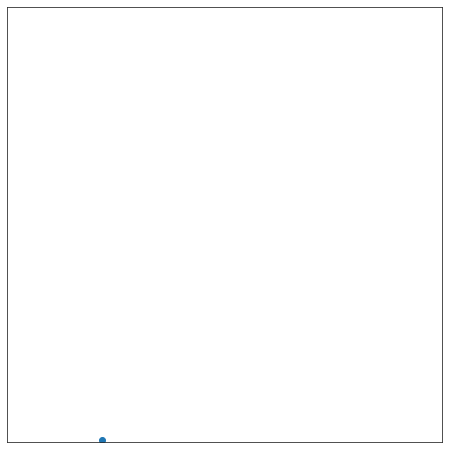

In [3]:
model = InfectionModel(1, 100, 100)

sns.set_style('white')

pos = np.asarray([(a.x, a.y)  for a in model.schedule.agents])
fig, ax = plt.subplots()
ax.set_xlim(model.space.x_min, model.space.x_max)
ax.set_ylim(model.space.y_min, model.space.y_max)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

ax.scatter(pos[:, 0], pos[:, 1])
plt.show()

## Assignment 4
We now have a basic model with a single agent. Now it is time to make this agent move around. This includes making the ball bounce of the wall.

Take your agent from the previous assignment, and copy it to here. Now, you have to fill in the step method of the agent. Sketch a basic flowchart for this step method. A few pointers:

* don't forget the radius of the ball
* don't forget to check top and bottom for y direction
* don't forget to check left and right for y direction
* you can get the min and max via the x_min etc. attributes on the continuous space




In [4]:
class Ball(Agent):
    """ An agent
    
    Parameters
    ----------
    unique_id : int
    model : Model instance
    angle : float
    pos : tuple
    radius : int, optional
    default_speed : int, optional
    
    
    Attributes
    ----------
    pos : tuple
          x, y coordinates
    angle : float
            direction of movement in radians
    speed : float
    speed_x : speed in x direction
    speed_y : speed in y direction
    x : float
    y : float
    radius : int
    
    # hint: use @properties to avoid
    # duplicating values
    
    """
    @property
    def pos(self):
        return self.x, self.y
    
    @pos.setter
    def pos(self, pos):
        if pos:
            self.x, self.y = pos
       
    @property
    def speed_x(self):
        return math.sin(self.angle)*self.speed

    @property
    def speed_y(self):
        return math.cos(self.angle)*self.speed

    def __init__(self, unique_id, model, angle=0, pos=(0,0), radius=1, default_speed=1):
        super().__init__(unique_id, model)

        self.angle = angle
        self.radius = radius
        self.speed = default_speed
        self.model.space.place_agent(self, pos)
        

    def step(self):
        # update my x and y position
        # check if the ball including radius goes over the edge in the x direction
        # if so, inverse direction of speed in x direction
        # check if the ball including radius goes over the edge in the y direction
        # if so, inverse direction of speed in y direction
        
        old_pos = self.pos
        
        self.x += self.speed_x
        self.y += self.speed_y
        
        xmin = self.model.space.x_min
        xmax = self.model.space.x_max
        ymin = self.model.space.y_min
        ymax = self.model.space.y_max
        
        old_angle = self.angle
        
        x_dir = self.speed_x
        if self.x-self.radius < xmin:
            self.x = xmin+self.radius
            x_dir *= -1
        elif self.x+self.radius > xmax:
            self.x = xmax-self.radius
            x_dir *= -1
        
        y_dir = self.speed_y
        if self.y-self.radius < ymin:
            self.y = ymin+self.radius
            y_dir *= -1 
        elif self.y+self.radius > ymax:
            self.y = ymax-self.radius
            y_dir *= -1 
        
        self.angle = math.atan2(x_dir, y_dir)
        self.model.space.move_agent(self, self.pos)    
    


By now it would be useful to seee an actually running animation of the model. MESA does support building animations, but these don't run nicely in the jupyter notebook / lab environment. Moreover, they rely on html5 technology. For now, instead, we are going to rely on matplotlib animations. Please read the documentation here: https://matplotlib.org/api/animation_api.html. 

The short summary is that you use FuncAnimation to update the figure. This class takes an update (and figure initialization) function. We can use FuncAnimation to create the animation. Next,we want to save the animation. A FuncAnimation instance has a save method. In the code below, created on a mac, I save my animation to mp4, which I can then load into the notebook as shown further down. However, you can also create a html5 video directly which can be embedded. See http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/ for details.

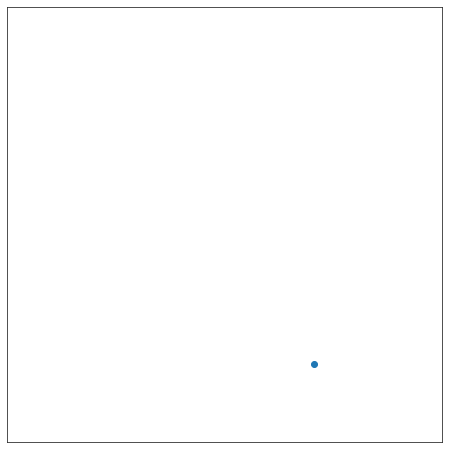

In [5]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation


sns.set_style('white')

model = InfectionModel(1, 100, 100)
agents = model.schedule.agents

pos = np.asarray([(a.x, a.y)  for a in model.schedule.agents])
fig, ax = plt.subplots()
ax.set_xlim(model.space.x_min, model.space.x_max)
ax.set_ylim(model.space.y_min, model.space.y_max)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

positions = ax.scatter(pos[:, 0], pos[:, 1])

def update(frame):
    model.step()
    
    pos = np.asarray([[agent.x, agent.y] for agent in agents])
    
    positions.set_offsets(pos)
    return positions

anim = FuncAnimation(fig, update, frames=500);
writervideo = animation.FFMpegWriter(fps=24) 
anim.save("bouncing ball.mp4", writer=writervideo)

In [6]:
from IPython.display import Video

Video("bouncing ball.mp4", width=600)

## Assignment 5
We now have a ball bouncing arround in the space. The next step is to add extra agents to this model and implement their interaction. If this were a physics simulation, we would have to ensure conservation of energy etc.. However, if you look carefully at the Washington Post example, you will see that the speed of the balls is constant. Instead, balls bounce of one another similar to how they interact with the wall.

* Given a pair of agents, when do they bounce of one another?

**they bounce if the distance between them is equal or less then 2 times their radius**

* Given a pair of agents which are bouncing, how can we calculate the new angles of movement? Consider checking wikipedia on elastic collisions. You can drop the mass from consideration because all agents have unit mass. The idea is to first calculate the speed in the x and y direction and then convert that to an angle using math.atan2

If you run the test code, you should get

| angle_1 | angle_2 |
| --- | --- |
| -1.3420392422744685 | 1.535286886329454 |
| -0.2621075927462976 | 2.2886180881083433 |
| -1.0926638118861656 | 2.1856525026969806 |
| 2.4955160000399244 | 2.495118805263091 |
| 3.1393692742483013 | 2.5362398341927865 |
| -2.9962544736745502 | 2.4341861540625076 |




In [7]:
def determine_angles(p1, p2):
    """
    Particles p1 and p2 have collided elastically: update their
    velocities.

    since radius is the same for both balls, we can drop this
    from the equations.
    
    """

    r1, r2 = np.asarray(p1.pos), np.asarray(p2.pos)
    d = np.linalg.norm(r1 - r2)**2
    v1 = np.asarray([p1.speed_x, p1.speed_y])
    v2 = np.asarray([p2.speed_x, p2.speed_y])
    u1 = v1 - np.dot(v1-v2, r1-r2) / d * (r1 - r2)
    u2 = v2 - np.dot(v2-v1, r2-r1) / d * (r2 - r1)
    
    angle_1 = math.atan2(*u1)    
    angle_2 = math.atan2(*u2)
    return angle_1, angle_2   


In [8]:
from itertools import combinations

model = InfectionModel(4, 100, 100, seed=123456789)
for a1, a2, in combinations(model.schedule.agents, 2):
    print(determine_angles(a1, a2))


(-1.3420392422744685, 1.535286886329454)
(-0.2621075927462976, 2.2886180881083433)
(-1.0926638118861656, 2.1856525026969806)
(2.4955160000399244, 2.495118805263091)
(3.1393692742483013, 2.5362398341927865)
(-2.9962544736745502, 2.4341861540625076)


* we can generate all pairs of agents using `itertools.combinations`. We can calculate all distances between agents using `sklearn.metrics.pairwise_distances`. Sketch a flow chart of how you can handle possible collisions

* implement the hande_collisions method in light of your flow chart

In [9]:
import math
from itertools import combinations
from enum import Enum
from sklearn import metrics

class InfectionModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height, radius=1,
                seed=None):
        super().__init__(seed=seed)
        self.num_agents = N
        self.space = ContinuousSpace(width, height, torus=False)
        self.schedule = RandomActivation(self)
    
        # Create agents
        for i in range(self.num_agents):
            
            # Add the agent to a random location
            while True:
                x = self.random.random() * self.space.width
                y = self.random.random() * self.space.height

                if i==0:
                    break
                    
                # ensure that we are not on top of any other agent
                neighbors = self.space.get_neighbors((x,y), 3*radius,
                                                    include_center=False)
                if not neighbors:
                    break
            
            direction = self.random.random() * 2 * math.pi 
            
            agent = Ball(i, self, angle=direction, pos=(x,y), radius=radius)
            self.schedule.add(agent)
   

    def step(self):
        self.schedule.step()
        self.hande_collisions()        
             
    def hande_collisions(self):
        # We're going to need a sequence of all of the pairs of particles when
        # we are detecting collisions. combinations generates pairs of indexes
        # into the self.particles list of Particles on the fly.
        pairs = combinations(np.arange(self.num_agents), 2)
        distances = metrics.pairwise_distances(self.space._agent_points)        
        
        for i, j in pairs:
            agent_i = self.schedule.agents[i]
            agent_j = self.schedule.agents[j]
            distance = distances[i,j]
            
            if distance < 2*agent_i.radius:
                a1, a2 = determine_angles(agent_i, agent_j)

                agent_i.angle = a1
                agent_j.angle = a2


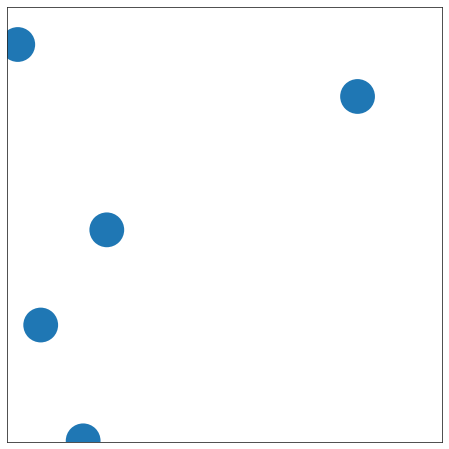

In [10]:
from matplotlib import collections

model = InfectionModel(5, 100, 100, radius=4, seed=123456)
agents = model.schedule.agents

sns.set_style('white')

pos = np.asarray([(a.x, a.y)  for a in model.schedule.agents])

fig, ax = plt.subplots()
ax.set_xlim(model.space.x_min, model.space.x_max)
ax.set_ylim(model.space.y_min, model.space.y_max)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# we are using circles and a PatchCollection instead 
# of a scatter plot because this allows us to draw 
# the radius is data coordinates.
circles = [plt.Circle(agent.pos, radius=agent.radius, 
                      linewidth=0) for agent in model.schedule.agents]
collection = collections.PatchCollection(circles, match_original=True)
ax.add_collection(collection)

def update(frame):
    model.step()
    circles = [plt.Circle(agent.pos, radius=agent.radius, linewidth=0) for agent in model.schedule.agents]
    collection.set_paths(circles)
    return collection

In [11]:
from IPython.display import HTML
anim = FuncAnimation(fig, update, frames=1000, interval=40);
HTML(anim.to_html5_video())

run your model multiple times, playing around with different numbers of agents. Pay carefull attention to the interactions amongst agents bouncing aganst each other. Do you notice anything strange? If so, what, and can you explain why this is happening?

sometimes agents can get 'glued' to each other. This happens if they partially overlap (so the bounce actually happens to late). There are all kinds of ways of fixing this. Basically, you calculate the distance between the centroids, if this is less than 2\*radius, you slightly move both centroids a bit away from each other. 

add the following to the end of handle collision, it is a fudge and not a clean solution....

                # fudge for overlap
                dx = agent_i.x-agent_j.x
                dy = agent_i.y-agent_j.y
                
                if abs(dx) < (2*agent_i.radius) or abs(dy) < (2*agent_i.radius):
                    tangent = math.atan2(dy, dx)
                    angle = 0.5 * math.pi + tangent

                    agent_i.x += math.sin(angle)
                    agent_i.y -= math.cos(angle)
                    agent_j.x -= math.sin(angle)
                    agent_j.y += math.cos(angle) 
                    
rerun the model, what happens now?

In [12]:
import math
from itertools import combinations
from enum import Enum
from sklearn import metrics

class InfectionModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height, radius=1,
                seed=None):
        super().__init__(seed=seed)
        self.num_agents = N
        self.space = ContinuousSpace(width, height, torus=False)
        self.schedule = RandomActivation(self)
    
        # Create agents
        for i in range(self.num_agents):
            
            # Add the agent to a random location
            while True:
                x = self.random.random() * self.space.width
                y = self.random.random() * self.space.height

                if i==0:
                    break
                    
                # ensure that we are not on top of any other agent
                neighbors = self.space.get_neighbors((x,y), 3*radius,
                                                    include_center=False)
                if not neighbors:
                    break
            
            direction = self.random.random() * 2 * math.pi 
            
            agent = Ball(i, self, angle=direction, pos=(x,y), radius=radius)
            self.schedule.add(agent)
   

    def step(self):
        self.schedule.step()
        self.hande_collisions()        
             
    def hande_collisions(self):
        # We're going to need a sequence of all of the pairs of particles when
        # we are detecting collisions. combinations generates pairs of indexes
        # into the self.particles list of Particles on the fly.
        pairs = combinations(np.arange(self.num_agents), 2)
        distances = metrics.pairwise_distances(self.space._agent_points)        
        
        for i, j in pairs:
            agent_i = self.schedule.agents[i]
            agent_j = self.schedule.agents[j]
            distance = distances[i,j]
            
            if distance < 2*agent_i.radius:
                a1, a2 = determine_angles(agent_i, agent_j)

                agent_i.angle = a1
                agent_j.angle = a2
                
                # fudge for overlap
                dx = agent_i.x-agent_j.x
                dy = agent_i.y-agent_j.y
                
                if abs(dx) < (2*agent_i.radius) or abs(dy) < (2*agent_i.radius):
                    tangent = math.atan2(dy, dx)
                    angle = 0.5 * math.pi + tangent

                    agent_i.x += math.sin(angle)
                    agent_i.y -= math.cos(angle)
                    agent_j.x -= math.sin(angle)
                    agent_j.y += math.cos(angle) 
               


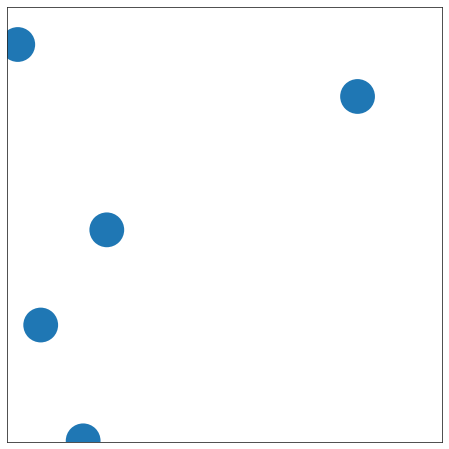

In [13]:
model = InfectionModel(5, 100, 100, radius=4, seed=123456)
agents = model.schedule.agents

sns.set_style('white')

pos = np.asarray([(a.x, a.y)  for a in model.schedule.agents])

fig, ax = plt.subplots()
ax.set_xlim(model.space.x_min, model.space.x_max)
ax.set_ylim(model.space.y_min, model.space.y_max)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# we are using circles and a PatchCollection instead 
# of a scatter plot because this allows us to draw 
# the radius is data coordinates.
circles = [plt.Circle(agent.pos, radius=agent.radius, 
                      linewidth=0) for agent in model.schedule.agents]
collection = collections.PatchCollection(circles, match_original=True)
ax.add_collection(collection)

def update(frame):
    model.step()
    circles = [plt.Circle(agent.pos, radius=agent.radius, linewidth=0) for agent in model.schedule.agents]
    collection.set_paths(circles)
    return collection

In [14]:
from IPython.display import HTML
anim = FuncAnimation(fig, update, frames=1000, interval=40);
HTML(anim.to_html5_video())

## Assignment 6
We now have a bunch of balls bouncing around and against one another. We now have to add a few more. pieces to this. First, we need to define the state of the agent (SUSCEPTIBLE, INFECTIOUS, RECOVERED). We can use an Enum for this, similar to what we did in the Schelling model. Second, we need to implement how agents move from one state to the next. When 2 agents bounce against one another, if either of them is infectious, the other also becomes infectious. If an agent becomes infectious, after a random number of ticks, the agent becomes recovered.

If we want to implement all of this, were do we need to make changes in our model (at least 4)? try to answer this without looking at the code block below.

1. `agent.__init__` needs to set a state attribute, defaults to susceptible
4. `agent.state` as a property in which we can also handle the timing of when we will be recovered
2. `agent.step` needs to check if infectious whether we have recovered
3. `model.handle_collisions` needs to be expanded to check if either agent involved in a collision is infectious in which case we need to update the state of the other agent.


In [17]:

class State(Enum):
    SUSCEPTIBLE = 1
    INFECTIOUS = 2
    RECOVERED = 3


class InfectionModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height, radius=1,
                seed=None):
        super().__init__(seed=seed)
        self.num_agents = N
        self.space = ContinuousSpace(width, height, torus=False)
        self.schedule = RandomActivation(self)
    
        # Create agents
        for i in range(self.num_agents):
            
            # Add the agent to a random location
            while True:
                x = self.random.random() * self.space.width
                y = self.random.random() * self.space.height

                if i==0:
                    break
                    
                # ensure that we are not on top of any other agent
                neighbors = self.space.get_neighbors((x,y), 3*radius,
                                                    include_center=False)
                if not neighbors:
                    break
            
            direction = self.random.random() * 2 * math.pi 
            
            agent = SIRBall(i, self, angle=direction, pos=(x,y), radius=radius)
            self.schedule.add(agent)
   
    def step(self):
        self.schedule.step()
        self.hande_collisions()        
             
    def hande_collisions(self):
        # We're going to need a sequence of all of the pairs of particles when
        # we are detecting collisions. combinations generates pairs of indexes
        # into the self.particles list of Particles on the fly.
        pairs = combinations(np.arange(self.num_agents), 2)
        distances = metrics.pairwise_distances(self.space._agent_points)        
        
        for i, j in pairs:
            agent_i = self.schedule.agents[i]
            agent_j = self.schedule.agents[j]
            distance = distances[i,j]
            
            if distance < 2*agent_i.radius:
                if agent_i.state == State.INFECTIOUS and agent_j.state==State.SUSCEPTIBLE:
                    agent_j.state = State.INFECTIOUS
                elif agent_j.state == State.INFECTIOUS and agent_i.state==State.SUSCEPTIBLE:
                    agent_i.state = State.INFECTIOUS
                
                a1, a2 = determine_angles(agent_i, agent_j)

                agent_i.angle = a1
                agent_j.angle = a2
                
                # fudge for overlap
                dx = agent_i.x-agent_j.x
                dy = agent_i.y-agent_j.y
                
                if abs(dx) < (2*agent_i.radius) or abs(dy) < (2*agent_i.radius):
                    tangent = math.atan2(dy, dx)
                    angle = 0.5 * math.pi + tangent

                    agent_i.x += math.sin(angle)
                    agent_i.y -= math.cos(angle)
                    agent_j.x -= math.sin(angle)
                    agent_j.y += math.cos(angle) 


class SIRBall(Ball):
    """ An agent
    
    Parameters
    ----------
    unique_id : int
    model : Model instance
    angle : float
    pos : tuple
    radius : int, optional
    default_speed : int, optional
    
    
    Attributes
    ----------
    pos : tuple
          x, y coordinates
    angle : float
            direction of movement in radians
    speed : float
    speed_x : speed in x direction
    speed_y : speed in y direction
    x : float
    y : float
    radius : int
    
    # hint: use @properties to avoid
    # duplicating values
    
    """
    @property
    def state(self):
        return self._state
    
    @state.setter
    def state(self, state):
        self._state = state
        if state == State.INFECTIOUS:
            self._time_recovered = self.model.schedule.time + 100+int(round(self.model.random.lognormvariate(3, 1))) 
        

    def __init__(self, unique_id, model, angle=0, pos=(0,0), radius=1, default_speed=1):
        super().__init__(unique_id, model, angle, pos, radius, default_speed)
        self.state = State.SUSCEPTIBLE
        

    def check_recovery(self):
        if self.model.schedule.time == self._time_recovered:
            self.state = State.RECOVERED
        
    def step(self):
        if self.state == State.INFECTIOUS:
            self.check_recovery()
        super().step()
    



In [18]:
model = InfectionModel(15, 100, 100, radius=4, seed=123456)
agents = model.schedule.agents
agents[0].state = State.INFECTIOUS # we start with 1 sick agent



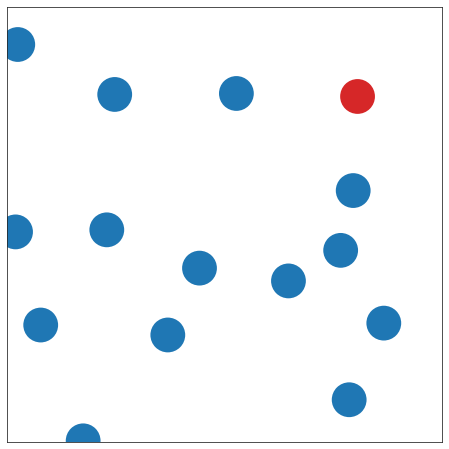

In [19]:
sns.set_style('white')
colors = sns.color_palette()
color_mapping = {State.SUSCEPTIBLE:colors[0],
                 State.INFECTIOUS:colors[3],
                 State.RECOVERED:colors[2],
                }


fig, ax = plt.subplots()
ax.set_xlim(model.space.x_min, model.space.x_max)
ax.set_ylim(model.space.y_min, model.space.y_max)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# we are using circles and a PatchCollection instead 
# of a scatter plot because this allows us to draw 
# the radius is data coordinates.
circles = [plt.Circle(agent.pos, radius=agent.radius, facecolor=color_mapping[agent.state],
                      linewidth=0) for agent in model.schedule.agents]
collection = collections.PatchCollection(circles, match_original=True)
ax.add_collection(collection)

def update(frame):
    model.step()
    circles = [plt.Circle(agent.pos, radius=agent.radius, linewidth=0) for agent in model.schedule.agents]
    
    colors = []
    for circle, agent in zip(circles, model.schedule.agents):
        circle.center = agent.pos
        colors.append(color_mapping[agent.state])

    collection.set_paths(circles)
    collection.set_facecolors(colors)
        
        
    return collection

In [20]:
anim = FuncAnimation(fig, update, frames=1000, interval=40);
HTML(anim.to_html5_video())